## 6.준고전적 수송이론의 근사적해
볼츠만 방정식(BTE)은 에너지에 대한 차원을 유지하고 있어 반도체 소자 시뮬레이션에서 사용하기 어렵다.\
에너지에 대한 차원을 제거한 Drift-Diffusion(DD) 식을 풀어준다.\
Drift-Diffusion 식은 연속 방정식과 전류 밀도 방정식에 대한 식들로 된다.\
두 식을 유도하고, 전류밀도를 이산화하는 방법을 배운다.\
계산전자공학의 가장 큰 목표 중의 하나인 '주어진 소자 구조에 대해서 특정 전압 조건에서의 단자 전류의 계산'을 이룰 수 있다.\
편의상 전자만 수송 현상에 참여하는 상황을 고려한다.

### 연속방정식
$$\frac{\partial n}{\partial t}+\nabla_r \cdot F_n=0$$
$$\frac{\partial n}{\partial t}=-\nabla_r \cdot F_n=\frac{1}{q}\nabla_r \cdot J_n$$

### 전류밀도 방정식
농도기울기와 더불어 전기장이 있으면, 드리프트전류와 확산전류가 모두 흐르게 된다.
$$J_n=q\mu_n n\varepsilon + qD_n\frac{dn}{dx}$$

1 0.33374
2 2.990467703259106e-05
3 1.5809809312130143e-11
4 2.680185126257721e-17
5 2.6799382800557015e-17
6 2.6799382800557015e-17
7 2.6799382800557015e-17
8 2.6799382800557015e-17
9 2.6799382800557015e-17


C:\Users\ppjm7\AppData\Local\Temp\ipykernel_2516\3688731816.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[3*ii+1] = b[3*ii+1] - nint*math.exp(-phi[ii]/VT)
C:\Users\ppjm7\AppData\Local\Temp\ipykernel_2516\3688731816.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[3*ii+1,3*ii] =  nint/VT*math.exp(-phi[ii]/VT)
C:\Users\ppjm7\AppData\Local\Temp\ipykernel_2516\3688731816.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[3*ii+2] = b[3*ii+2] - nint*ma

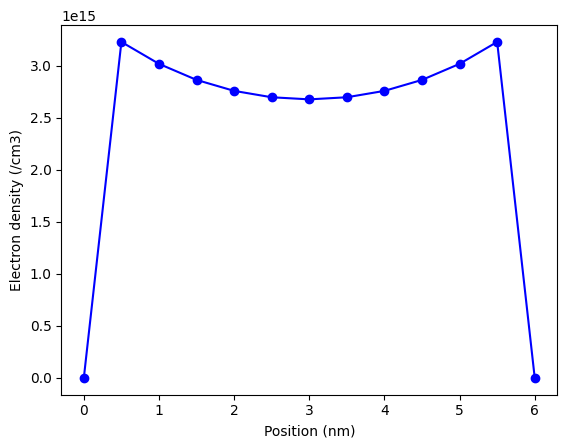

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

q = 1.602192e-19
epsilon0 = 8.854187817e-12
nint = 1e16
kB = 1.38065e-23 # Boltzmann constant
T = 300.0
VT = kB*T/q

# a is the length in m.
a = 6e-9
tox = 0.5e-9
N = 12
l0 = a/N
iox = round(tox/l0)
interface1 = iox
interface2 = N-iox
epsilon_si = 11.7
epsilon_ox = 3.9
Ndop = -1e24

x = np.arange(N+1)* a / N

phi = np.zeros( (N+1, 1  ) )
hole = np.zeros( (N+1, 1  ) )
elec = np.zeros( (N+1, 1  ) )

for inewton in range(1,10):

    A = np.zeros( (3*(N+1), 3*(N+1)) )
    b = np.zeros( (3*(N+1), 1      ) )  
    
    for ii in range(1,N):    
        epsilon_l = epsilon_ox
        epsilon_r = epsilon_ox
        if ii>=interface1+1 and ii<=interface2:
            epsilon_l = epsilon_si
        if ii>=interface1 and ii<=interface2-1:
            epsilon_r = epsilon_si    

        b[3*ii] = epsilon_r*(phi[ii+1]-phi[ii])-epsilon_l*(phi[ii]-phi[ii-1])
        A[3*ii,3*(ii-1)] = epsilon_l
        A[3*ii,3* ii   ] = -epsilon_l-epsilon_r
        A[3*ii,3*(ii+1)] = epsilon_r

        b[3*ii+1] = hole[ii]
        A[3*ii+1,3*ii+1] = 1.0

        b[3*ii+2] = elec[ii]
        A[3*ii+2,3*ii+2] = 1.0

    for ii in range(interface1,interface2+1):
        control = 1.0
        if ii==interface1 or ii==interface2:
            control = 0.5
        b[3*ii] = b[3*ii] + q*(hole[ii]-elec[ii]+Ndop)/epsilon0*l0*l0*control
        A[3*ii,3*ii+1] =  q/epsilon0*l0*l0*control
        A[3*ii,3*ii+2] = -q/epsilon0*l0*l0*control
        b[3*ii+1] = b[3*ii+1] - nint*math.exp(-phi[ii]/VT)
        A[3*ii+1,3*ii] =  nint/VT*math.exp(-phi[ii]/VT)
        b[3*ii+2] = b[3*ii+2] - nint*math.exp( phi[ii]/VT)
        A[3*ii+2,3*ii] = -nint/VT*math.exp( phi[ii]/VT)

    b[0] = phi[0] - 0.33374
    A[0,0] = 1.0
    b[3*N] = phi[N] - 0.33374
    A[3*N,3*N] = 1.0

    b[1] = hole[0]
    A[1,1] = 1.0
    b[3*N+1] = hole[N]
    A[3*N+1,3*N+1] = 1.0

    b[2] = elec[0]
    A[2,2] = 1.0
    b[3*N+2] = elec[N]
    A[3*N+2,3*N+2] = 1.0

    update = np.linalg.solve(A, b)

    print( inewton, np.linalg.norm(update[range(0,3*(N+1),3)],np.inf) )
    
    phi  = phi  - update[range(0,3*(N+1),3)]
    hole = hole - update[range(1,3*(N+1),3)]
    elec = elec - update[range(2,3*(N+1),3)]

plt.plot(x/1e-9,elec/1e6,'bo-')
plt.xlabel('Position (nm)')
plt.ylabel('Electron density (/cm3)')
plt.show()

C:\Users\ppjm7\AppData\Local\Temp\ipykernel_12000\3554207321.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ii] = VT*math.asinh(0.5*dop[ii]/nint)
C:\Users\ppjm7\AppData\Local\Temp\ipykernel_12000\3554207321.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[3*ii+1] = b[3*ii+1] - nint*math.exp(-phi[ii]/VT)
C:\Users\ppjm7\AppData\Local\Temp\ipykernel_12000\3554207321.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[3*ii+1,3*ii] =  nint/VT*math.exp

1 0.9265800696072896
2 0.38282332531690033
3 0.12019573118848392
4 0.030156853720773116
5 0.0035233023693160086
6 7.431294578432196e-05
7 4.48573499710831e-08
8 1.9224435179884772e-14
9 9.311902390213868e-17


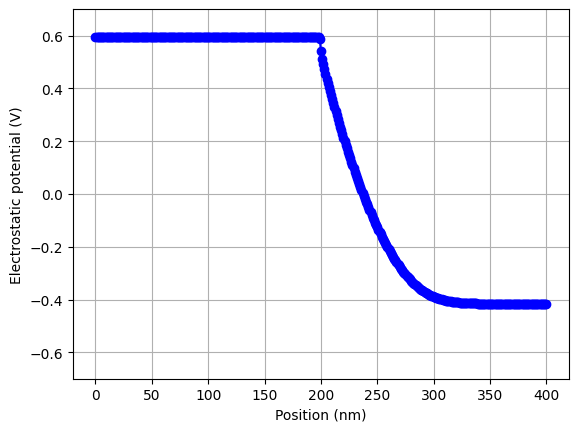

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

q = 1.602192e-19
epsilon0 = 8.854187817e-12
nint = 1e16
kB = 1.38065e-23 # Boltzmann constant
T = 300.0
VT = kB*T/q

# L is the length in m.
L = 400e-9
N = 400
ijunction = 200
l0 = L/N
epsilon_si = 11.7
ND = 1e20
ND = ND * 1e6
phiD = VT*math.asinh(0.5*ND/nint)
NA = 1e17
NA = NA * 1e6
phiA = -VT*math.asinh(0.5*NA/nint)

x = np.arange(N+1)* L / N
dop = np.zeros ( (N+1,1) )
dop[0:ijunction] = ND
dop[ijunction:N+1] = -NA

phi = np.zeros( (N+1, 1  ) )
for ii in range(0,N+1):
    phi[ii] = VT*math.asinh(0.5*dop[ii]/nint)
hole = np.zeros( (N+1, 1  ) )
elec = np.zeros( (N+1, 1  ) )

for inewton in range(1,10):

    A = np.zeros( (3*(N+1), 3*(N+1)) )
    b = np.zeros( (3*(N+1), 1      ) )  
    
    for ii in range(1,N):    
        
        b[3*ii] = epsilon_si*(phi[ii+1]-phi[ii])-epsilon_si*(phi[ii]-phi[ii-1])
        A[3*ii,3*(ii-1)] = epsilon_si
        A[3*ii,3* ii   ] = -epsilon_si-epsilon_si
        A[3*ii,3*(ii+1)] = epsilon_si

        b[3*ii+1] = hole[ii]
        A[3*ii+1,3*ii+1] = 1.0

        b[3*ii+2] = elec[ii]
        A[3*ii+2,3*ii+2] = 1.0
    
        b[3*ii] = b[3*ii] + q*(hole[ii]-elec[ii]+dop[ii])/epsilon0*l0*l0
        A[3*ii,3*ii+1] =  q/epsilon0*l0*l0
        A[3*ii,3*ii+2] = -q/epsilon0*l0*l0
        b[3*ii+1] = b[3*ii+1] - nint*math.exp(-phi[ii]/VT)
        A[3*ii+1,3*ii] =  nint/VT*math.exp(-phi[ii]/VT)
        b[3*ii+2] = b[3*ii+2] - nint*math.exp( phi[ii]/VT)
        A[3*ii+2,3*ii] = -nint/VT*math.exp( phi[ii]/VT)

    b[0] = phi[0] - phiD
    A[0,0] = 1.0
    b[3*N] = phi[N] - phiA
    A[3*N,3*N] = 1.0

    b[1] = hole[0] - nint*math.exp(-phiD/VT)
    A[1,1] = 1.0
    b[3*N+1] = hole[N] - nint*math.exp(-phiA/VT)
    A[3*N+1,3*N+1] = 1.0

    b[2] = elec[0] - nint*math.exp(phiD/VT)
    A[2,2] = 1.0
    b[3*N+2] = elec[N] - nint*math.exp(phiA/VT)
    A[3*N+2,3*N+2] = 1.0

    update = np.linalg.solve(A, b)

    print( inewton, np.linalg.norm(update[range(0,3*(N+1),3)],np.inf) )
    
    phi  = phi  - update[range(0,3*(N+1),3)]
    hole = hole - update[range(1,3*(N+1),3)]
    elec = elec - update[range(2,3*(N+1),3)]

#plt.plot(x/1e-9,dop/1e6,'bo-')
#plt.xlabel('Position (nm)')
#plt.ylabel('Doping concentration (/cm3)')
#plt.show()

plt.plot(x/1e-9,phi,'bo-')
plt.xlabel('Position (nm)')
plt.ylabel('Electrostatic potential (V)')
plt.ylim(-0.7,0.7), plt.grid()
plt.show()

C:\Users\ppjm7\AppData\Local\Temp\ipykernel_12000\1061300233.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ii] = VT*math.asinh(0.5*dop[ii]/nint)
C:\Users\ppjm7\AppData\Local\Temp\ipykernel_12000\1061300233.py:92: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[3*ii+1] = b[3*ii+1] - nint*math.exp(-phi[ii]/VT)
C:\Users\ppjm7\AppData\Local\Temp\ipykernel_12000\1061300233.py:93: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[3*ii+1,3*ii] =  nint/VT*math.exp

1 0.41353029586751816
2 0.12226579751541022
3 0.027776959004158136
4 0.0028429692804120884
5 4.7967720345859876e-05
6 1.8636905810065627e-08
7 3.3318131334969835e-15
8 2.830806233107384e-17
9 2.788343692161473e-17
0.0


C:\Users\ppjm7\AppData\Local\Temp\ipykernel_12000\1061300233.py:231: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  IV[ibias,1] =  q*Dp/l0*( hole[jj]*Ber(-dphi) - hole[jj-1]*Ber( dphi) )
C:\Users\ppjm7\AppData\Local\Temp\ipykernel_12000\1061300233.py:232: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  IV[ibias,2] = -q*Dn/l0*( elec[jj]*Ber( dphi) - elec[jj-1]*Ber(-dphi) )


0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0


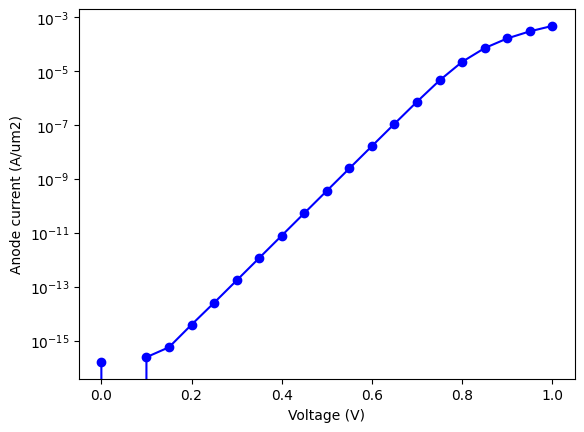

In [3]:
import math
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

def Ber(x):
    c = abs(x)
    if (c < 2.502e-2):
        x2 = x*x
        return 1.0-x/2.0+x2/12.0*(1.0-x2/60.0*(1.0-x2/42.0))
    elif (c < 1.5e-1):
        x2 = x*x
        return 1.0-x/2.0+x2/12.0*(1.0-x2/60.0*(1.0-x2/42.0*(1.0-x2/40.0*(1.0-0.02525252525252525252525*x2))))       
    elif (x > 150.01):
        return x*math.exp(-x)
    else:
        return x/(math.exp(x)-1.0)

def dBer(x):
    c = abs(x)
    if (c < 2.502e-2):
        x2 = x*x
        return -0.5+x/6.0*(1.0-x2/30.0*(1.0-x2/28.0))
    elif (c < 1.5e-1):
        x2 = x*x
        return -0.5+x/6.0*(1.0-x2/30.0*(1.0-x2/28.0*(1.0-x2/30.0*(1.0-0.03156565656565656565657*x2))))
    elif (x > 150.01):
        return math.exp(-x) - Ber(x)
    else:
        inv_expx_1 = 1.0/(math.exp(x)-1.0)
        return inv_expx_1-Ber(x)*(inv_expx_1+1.0)

q = 1.602192e-19
epsilon0 = 8.854187817e-12
nint = 1.075e16
kB = 1.38065e-23 # Boltzmann constant
T = 300.0
VT = kB*T/q
Dp = 470.5 * 1e-4 * VT 
Dn = 1417 * 1e-4 * VT 

# L is the length in m.
L = 400e-9
N = 10000 #
ijunction = N // 2
l0 = L/N
epsilon_si = 11.7
ND = 1e17
ND = ND * 1e6
phiD = VT*math.asinh(0.5*ND/nint)
NA = 1e17
NA = NA * 1e6
phiA = -VT*math.asinh(0.5*NA/nint)

x = np.arange(N+1)* L / N
dop = np.zeros ( (N+1,1) )
dop[0:ijunction] = ND
dop[ijunction+1:N+1] = -NA

phi = np.zeros( (N+1, 1  ) )
for ii in range(0,N+1):
    phi[ii] = VT*math.asinh(0.5*dop[ii]/nint)
hole = np.zeros( (N+1, 1  ) )
elec = np.zeros( (N+1, 1  ) )

#####################
# Nonlinear Poisson #
##################### 

for inewton in range(1,10):

    #A = np.zeros( (3*(N+1), 3*(N+1)) )
    A = sparse.lil_matrix( (3*(N+1), 3*(N+1)) )
    b = np.zeros( (3*(N+1), 1      ) )  
    
    for ii in range(1,N):    
        
        b[3*ii] = epsilon_si*(phi[ii+1]-phi[ii])-epsilon_si*(phi[ii]-phi[ii-1])
        A[3*ii,3*(ii-1)] = epsilon_si
        A[3*ii,3* ii   ] = -epsilon_si-epsilon_si
        A[3*ii,3*(ii+1)] = epsilon_si

        b[3*ii+1] = hole[ii]
        A[3*ii+1,3*ii+1] = 1.0

        b[3*ii+2] = elec[ii]
        A[3*ii+2,3*ii+2] = 1.0
    
        b[3*ii] = b[3*ii] + q*(hole[ii]-elec[ii]+dop[ii])/epsilon0*l0*l0
        A[3*ii,3*ii+1] =  q/epsilon0*l0*l0
        A[3*ii,3*ii+2] = -q/epsilon0*l0*l0
        b[3*ii+1] = b[3*ii+1] - nint*math.exp(-phi[ii]/VT)
        A[3*ii+1,3*ii] =  nint/VT*math.exp(-phi[ii]/VT)
        b[3*ii+2] = b[3*ii+2] - nint*math.exp( phi[ii]/VT)
        A[3*ii+2,3*ii] = -nint/VT*math.exp( phi[ii]/VT)

    b[0] = phi[0] - phiD
    A[0,0] = 1.0
    b[3*N] = phi[N] - phiA
    A[3*N,3*N] = 1.0

    b[1] = hole[0] - nint*math.exp(-phiD/VT)
    A[1,1] = 1.0
    b[3*N+1] = hole[N] - nint*math.exp(-phiA/VT)
    A[3*N+1,3*N+1] = 1.0

    b[2] = elec[0] - nint*math.exp(phiD/VT)
    A[2,2] = 1.0
    b[3*N+2] = elec[N] - nint*math.exp(phiA/VT)
    A[3*N+2,3*N+2] = 1.0

    A = A.tocsr()

    #update = np.linalg.solve(A, b)
    update = sparse.linalg.spsolve(A, b)
    update = update[:,None]

    print( inewton, np.linalg.norm(update[range(0,3*(N+1),3)],np.inf) )
    
    phi  = phi  - update[range(0,3*(N+1),3)]
    hole = hole - update[range(1,3*(N+1),3)]
    elec = elec - update[range(2,3*(N+1),3)]

#plt.plot(x/1e-9,dop/1e6,'bo-')
#plt.xlabel('Position (nm)')
#plt.ylabel('Doping concentration (/cm3)')
#plt.show()

#plt.plot(x/1e-9,phi,'bo-')
#plt.xlabel('Position (nm)')
#plt.ylabel('Electrostatic potential (V)')
#plt.ylim(-0.7,0.7)
#plt.show()

###################
# Drift-diffusion #
################### 

IV = np.zeros( (21,4) )

for ibias in range(0,21):

    Vapplied = 0.05*ibias
    print(Vapplied)
    IV[ibias,0] = Vapplied

    for inewton in range(1,40):

        #A = np.zeros( (3*(N+1), 3*(N+1)) )
        A = sparse.lil_matrix( (3*(N+1), 3*(N+1)) )
        b = np.zeros( (3*(N+1), 1      ) )  
    
        for ii in range(1,N):    

            # Poisson
        
            b[3*ii] = epsilon_si*(phi[ii+1]-phi[ii])-epsilon_si*(phi[ii]-phi[ii-1])
            A[3*ii,3*(ii-1)] = epsilon_si
            A[3*ii,3* ii   ] = -epsilon_si-epsilon_si
            A[3*ii,3*(ii+1)] = epsilon_si

            b[3*ii] = b[3*ii] + q*(hole[ii]-elec[ii]+dop[ii])/epsilon0*l0*l0
            A[3*ii,3*ii+1] =  q/epsilon0*l0*l0
            A[3*ii,3*ii+2] = -q/epsilon0*l0*l0

            # Hole continuity

            dphi = (phi[ii+1]-phi[ii])/VT
            b[3*ii+1] = -q*Dp/l0*( hole[ii+1]*Ber(-dphi) - hole[ii]*Ber(dphi) )
            A[3*ii+1,3*(ii+1)+1] = A[3*ii+1,3*(ii+1)+1] - q*Dp/l0*(  Ber(-dphi) )
            A[3*ii+1,3* ii   +1] = A[3*ii+1,3* ii   +1] - q*Dp/l0*( -Ber( dphi) )
            A[3*ii+1,3*(ii+1)  ] = A[3*ii+1,3*(ii+1)  ] - q*Dp/l0*( -hole[ii+1]*dBer(-dphi) - hole[ii]*dBer(dphi) ) / VT
            A[3*ii+1,3* ii     ] = A[3*ii+1,3* ii     ] - q*Dp/l0*(  hole[ii+1]*dBer(-dphi) + hole[ii]*dBer(dphi) ) / VT        

            dphi = (phi[ii]-phi[ii-1])/VT
            b[3*ii+1] = b[3*ii+1] + q*Dp/l0*( hole[ii]*Ber(-dphi) - hole[ii-1]*Ber(dphi) )
            A[3*ii+1,3* ii   +1] = A[3*ii+1,3* ii   +1] + q*Dp/l0*(  Ber(-dphi) )
            A[3*ii+1,3*(ii-1)+1] = A[3*ii+1,3*(ii-1)+1] + q*Dp/l0*( -Ber( dphi) )
            A[3*ii+1,3* ii     ] = A[3*ii+1,3* ii     ] + q*Dp/l0*( -hole[ii]*dBer(-dphi) - hole[ii-1]*dBer(dphi) ) / VT
            A[3*ii+1,3*(ii-1)  ] = A[3*ii+1,3*(ii-1)  ] + q*Dp/l0*(  hole[ii]*dBer(-dphi) + hole[ii-1]*dBer(dphi) ) / VT

            # Electron continuity

            dphi = (phi[ii+1]-phi[ii])/VT
            b[3*ii+2] = q*Dn/l0*( elec[ii+1]*Ber(dphi) - elec[ii]*Ber(-dphi) )
            A[3*ii+2,3*(ii+1)+2] = A[3*ii+2,3*(ii+1)+2] + q*Dn/l0*(  Ber( dphi) )
            A[3*ii+2,3* ii   +2] = A[3*ii+2,3* ii   +2] + q*Dn/l0*( -Ber(-dphi) )
            A[3*ii+2,3*(ii+1)  ] = A[3*ii+2,3*(ii+1)  ] + q*Dn/l0*(  elec[ii+1]*dBer(dphi) + elec[ii]*dBer(-dphi) ) / VT
            A[3*ii+2,3* ii     ] = A[3*ii+2,3* ii     ] + q*Dn/l0*( -elec[ii+1]*dBer(dphi) - elec[ii]*dBer(-dphi) ) / VT       

            dphi = (phi[ii]-phi[ii-1])/VT
            b[3*ii+2] = b[3*ii+2] - q*Dn/l0*( elec[ii]*Ber(dphi) - elec[ii-1]*Ber(-dphi) )
            A[3*ii+2,3* ii   +2] = A[3*ii+2,3* ii   +2] - q*Dn/l0*(  Ber( dphi) )
            A[3*ii+2,3*(ii-1)+2] = A[3*ii+2,3*(ii-1)+2] - q*Dn/l0*( -Ber(-dphi) )
            A[3*ii+2,3* ii     ] = A[3*ii+2,3* ii     ] - q*Dn/l0*(  elec[ii]*dBer(dphi) + elec[ii-1]*dBer(-dphi) ) / VT
            A[3*ii+2,3*(ii-1)  ] = A[3*ii+2,3*(ii-1)  ] - q*Dn/l0*( -elec[ii]*dBer(dphi) - elec[ii-1]*dBer(-dphi) ) / VT       
        
        b[0] = phi[0] - phiD
        A[0,0] = 1.0
        b[3*N] = phi[N] - phiA - Vapplied
        A[3*N,3*N] = 1.0

        b[1] = hole[0] - nint*math.exp(-phiD/VT)
        A[1,1] = 1.0
        b[3*N+1] = hole[N] - nint*math.exp(-phiA/VT)
        A[3*N+1,3*N+1] = 1.0

        b[2] = elec[0] - nint*math.exp(phiD/VT)
        A[2,2] = 1.0
        b[3*N+2] = elec[N] - nint*math.exp(phiA/VT)
        A[3*N+2,3*N+2] = 1.0

        A = A.tocsr()

        #update = np.linalg.solve(A, b)
        update = sparse.linalg.spsolve(A,b,False)
        update = update[:,None]

        phi  = phi  - update[range(0,3*(N+1),3)]
        hole = hole - update[range(1,3*(N+1),3)]
        elec = elec - update[range(2,3*(N+1),3)]

        phiNorm = np.linalg.norm(update[range(0,3*(N+1),3)],np.inf)

        #print( inewton, np.linalg.norm(update[range(0,3*(N+1),3)],np.inf), np.linalg.norm(update[range(1,3*(N+1),3)],np.inf), np.linalg.norm(update[range(2,3*(N+1),3)],np.inf) )

        if phiNorm<1e-10:
            #jj = ijunction
            jj = N
            dphi = (phi[jj]-phi[jj-1])/VT
            IV[ibias,1] =  q*Dp/l0*( hole[jj]*Ber(-dphi) - hole[jj-1]*Ber( dphi) )
            IV[ibias,2] = -q*Dn/l0*( elec[jj]*Ber( dphi) - elec[jj-1]*Ber(-dphi) )
            IV[ibias,3] = IV[ibias,1] + IV[ibias,2]
            break

#print(phi)
#print(hole)
#print(elec)

#plt.plot(x/1e-9,elec/1e6,'bo-')
#plt.plot(x/1e-9,hole/1e6,'rs-')
#plt.xlabel('Position (nm)')
#plt.ylabel('Carrier density (/cm3)')
#plt.yscale('log')
#plt.show()
        
#print(IV)

#jp = np.zeros( (N,1) )
#jn = np.zeros( (N,1) )
#for ii in range(1,N+1):
#    dphi = (phi[ii]-phi[ii-1])/VT
#    jp[ii-1] =  q*Dp/l0*( hole[ii]*Ber(-dphi) - hole[ii-1]*Ber( dphi) )
#    jn[ii-1] = -q*Dn/l0*( elec[ii]*Ber( dphi) - elec[ii-1]*Ber(-dphi) )

#plt.plot(abs(jp[::-1])*1e-4,'r')
#plt.plot(abs(jn[::-1])*1e-4,'b')
#plt.show()

plt.plot(IV[:,0],IV[:,1]/1e12,'bo-')
plt.xlabel('Voltage (V)')
#plt.ylabel('Newton iteration (1)')
plt.ylabel('Anode current (A/um2)')
#plt.ylim(0,6)
plt.yscale('log')
plt.show()
        